<a href="https://colab.research.google.com/github/adnilsomar/DadosPython-Limpeza/blob/main/EDA_Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introdução**

---


Bem-vindo a este notebook de análise de dados, onde exploraremos o comportamento das reservas canceladas em hotéis. A compreensão das reservas canceladas é fundamental para a gestão eficaz de um estabelecimento hoteleiro, pois pode afetar a receita e a eficiência operacional.

## **Objetivo**

---


O objetivo deste notebook é realizar uma análise abrangente das reservas canceladas em hotéis, incluindo:

* Distribuição de Reservas por Tipo de Hotel: Investigaremos como as reservas estão distribuídas entre diferentes tipos de hotéis (por exemplo, resort hotel e city hotel).

* Prazo de Entrega da Reserva: Analisaremos como o prazo de entrega da reserva (lead time) afeta a probabilidade de cancelamento.

* Origem dos Hóspedes: Verificaremos se a origem dos hóspedes (país de residência) desempenha um papel nas reservas canceladas.

A análise será baseada em um conjunto de dados que contém informações detalhadas sobre as reservas em hotéis, incluindo dados demográficos dos hóspedes, informações sobre a reserva e o status de cancelamento.



---
<br/>***Para mais informação sobre origen, licença e descrição do conjunto de dados: [Clique aqui!](https://www.kaggle.com/datasets/aminaidhm23386/hotel-booking-new)***<br/><br/>

---


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Antes de carregar os datos, vamos criar uma lista para identificar valores ausentes.
lista_valores_ausetes = ['n/a', "na", "undefined"]

In [3]:
#Carregando os dados
dataset = pd.read_csv("https://raw.githubusercontent.com/adnilsomar/DadosPython-Limpeza/main/hotel_booking.csv", na_values = lista_valores_ausetes)

In [4]:
#Shape
dataset.shape

(119390, 36)

In [5]:
#Amostra dos dados
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
dataset.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### **Tratamento dos valores ausentes**

---

In [9]:
####################################################################################################################################################

# Função para calcular porcentagem de valores ausentes

def func_percentual_valores_ausentes(df):

  # Total de células no dataset
  totalCells = np.product(df.shape)

  # Valores ausentes por coluna
  missingCount = df.isnull().sum()

  # Total de valores ausentes
  totalMissing = missingCount.sum()

  # Porcentagem de valores ausentes
  print("O dataset tem", round(((totalMissing/totalCells)*100), 2), "%", "de valores ausentes.")

####################################################################################################################################################

# Função para calcular porcentagem de linhas com valores ausentes

def func_percentual_valores_ausentes_linha(df):

  #Número total de linhas com valores ausentes
  missingRows = sum([True for idx, row in df.iterrows() if any(row.isna())])

  #Número total de linhas
  total_rows = df.shape[0]

  #Porcentagem de linhas com valores ausentes
  print(round(((missingRows/total_rows)*100),2), "%", "das linhas no conjunto de dados contêm pelo menos um valor ausente.")

####################################################################################################################################################

# Função para calcular valores ausentes por coluna

def func_percentual_valores_ausentes_coluna(df):

  # Toltal valores ausentes
  misCount = df.isnull().sum()

  # Percentual de valores ausentes
  missingPercent = misCount*100 / len(df)

  # tipo de dado con colunas com valores ausentes
  mis_val_type= df.dtypes

  # Criando uma tabela com os resultados

  mis_val_table = pd.concat([misCount, missingPercent, mis_val_type], axis = 1)

  # renomear colunas
  mis_val_table_ren_columns = mis_val_table.rename(columns={0: 'Valores ausentes', 1: '% de valores ausentes', 2: 'Dtype'})

  # Classifica a tabela por porcentagem de valres ausentes de forma decrescente e remove colunas sem favlores faltantes
  mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,0] !=0].sort_values('% de valores ausentes', ascending = False).round(1)

  # Print
  print("\n O dataset tem " + str(df.shape[1]) + " colunas.\n"
    "\n Encontrado: " + str(mis_val_table_ren_columns.shape[0]) + " Colunas que tem valores ausentes.\n")

  if mis_val_table_ren_columns.empty:
    return

  # Retorna o dataframe com informações ausentes
  return mis_val_table_ren_columns

In [10]:
func_percentual_valores_ausentes(dataset)

O dataset tem 3.01 % de valores ausentes.


In [11]:
func_percentual_valores_ausentes_linha(dataset)

99.82 % das linhas no conjunto de dados contêm pelo menos um valor ausente.


In [12]:
func_percentual_valores_ausentes_coluna(dataset)


 O dataset tem 36 colunas.

 Encontrado: 4 Colunas que tem valores ausentes.



,Valores ausentes,% de valores ausentes,Dtype
company,112593,94.3,float64
agent,16340,13.7,float64
country,488,0.4,object
children,4,0.0,float64


O atributo "company" contém os IDs das empresas responsáveis pelas reservas. A quantidade de dados nulos pode ser atribuída a diferentes fatores, tais como:

* Não fornecimento de informações: Em alguns casos, clientes que efetuam reservas individuais podem optar por não fornecer informações sobre a empresa ou entidade à qual estão associados, resultando em valores nulos nesta coluna.

* Coleta de dados opcional: A coleta de informações sobre a empresa ou entidade pode ser opcional durante o processo de reserva de hotel, e alguns clientes podem escolher não compartilhar essas informações.

Considerando que o atributo "company" não desempenha um papel fundamental em nossa análise e, com base nisso, tomamos a decisão de remover esta coluna, a fim de simplificar o conjunto de dados e focar nos elementos mais relevantes para nossa análise.

In [13]:
#Excluindo a coluna 'Company'
dataset =dataset.drop('company', axis = 1)

In [14]:
#Avaliando as porcentagens após excluir a coluna 'company'.
func_percentual_valores_ausentes(dataset)
print('========================================')
func_percentual_valores_ausentes_linha(dataset)
print('========================================')
func_percentual_valores_ausentes_coluna(dataset)

O dataset tem 0.4 % de valores ausentes.
13.82 % das linhas no conjunto de dados contêm pelo menos um valor ausente.

 O dataset tem 35 colunas.

 Encontrado: 3 Colunas que tem valores ausentes.



,Valores ausentes,% de valores ausentes,Dtype
agent,16340,13.7,float64
country,488,0.4,object
children,4,0.0,float64


A coluna "agente" representa o ID do agente de viagens, e a ausência de valores nessa coluna é justificável, uma vez que nem todas as reservas necessariamente envolvem a intervenção de um agente. Essa circunstância resulta na falta de valores na coluna "Agente". Os valores ausentes nesta coluna serão preenchidos utilizando uma técnica de imputação com um valor padrão, em que o valor padrão estabelecido será "Sem agente".

In [15]:
#Preechimento de valores ausentes na coluna "agent" com a técnica de imputação com um valor padrão.
dataset['agent'].fillna('Sem agente', inplace=True)

A presença de valores ausentes na coluna "country" de um DataFrame de reservas de hotel pode ser atribuída a diversas razões, incluindo:

* Não fornecimento de informações: Em alguns casos, os clientes podem optar por não fornecer informações sobre seu país de origem ao fazer uma reserva de hotel. Isso pode ocorrer por questões de privacidade ou porque o campo de país de origem é opcional.

* Reservas sem país de origem: Algumas reservas podem ser feitas sem a necessidade de especificar o país de origem do cliente, especialmente se o hotel não exige essa informação para todas as reservas.

* Reservas internacionais: Para reservas de clientes internacionais, pode haver casos em que o país de origem não é registrado devido à complexidade da reserva internacional.

* Política de privacidade: Alguns clientes podem não fornecer informações sobre seu país de origem devido a preocupações com a privacidade.

* Registros incompletos: Em algumas situações, os registros de reserva podem estar incompletos ou podem ter falhas que resultam na ausência de informações de país de origem.

Dado que a quantidade de dados ausentes na coluna 'Country' representa apenas 0,4%, optaremos pela imputação com o valor mais frequente. Essa estratégia envolve a substituição dos valores ausentes pelo valor que mais frequentemente aparece nessa coluna.

Essa abordagem é apropriada devido à baixa porcentagem de dados ausentes, garantindo que a integridade dos dados seja mantida enquanto se preenchem os valores faltantes com uma estimativa razoável.

In [16]:
#Preechimento de valores ausentes na coluna "country" com a técnica de imputação com o valor mais frequante.
valor_mais_frecuente = dataset['country'].mode()[0]
dataset['country'].fillna(valor_mais_frecuente, inplace=True)

A coluna "children" apresenta apenas 4 valores ausentes, portanto, optamos por eliminar essas linhas, uma vez que sua presença ou ausência não representa um impacto significativo em nossa análise.

Essa decisão é apropriada devido ao número muito baixo de valores ausentes, o que minimiza a perda de dados no conjunto geral e não afeta substancialmente a análise em andamento.

In [17]:
#Excluindo as linhas onde a coluna "children" apresenta valores ausentes.
dataset.dropna(subset=['children'], inplace=True)


In [18]:
#Avaliando novamente as colunas para verificar que já não existem valores ausentes.
func_percentual_valores_ausentes(dataset)
print('========================================')
func_percentual_valores_ausentes_linha(dataset)
print('========================================')
func_percentual_valores_ausentes_coluna(dataset)

O dataset tem 0.0 % de valores ausentes.
0.0 % das linhas no conjunto de dados contêm pelo menos um valor ausente.

 O dataset tem 35 colunas.

 Encontrado: 0 Colunas que tem valores ausentes.



In [19]:
#excluindo outras colunas desnecessarias"

excluir_col= ['name', 'email', 'phone-number', 'credit_card']

dataset_clean = dataset.drop(columns=excluir_col)

dataset_clean = dataset_clean.sort_values(by = 'arrival_date_year', ascending=False)

In [20]:
dataset_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,0,No Deposit,9.0,0,Transient,151.20,0,2,Check-Out,2017-09-07
38148,Resort Hotel,0,159,2017,July,27,7,1,2,2,...,0,No Deposit,314.0,0,Transient,99.60,0,0,Check-Out,2017-07-10
38130,Resort Hotel,0,81,2017,July,27,5,1,4,2,...,1,No Deposit,250.0,0,Transient,228.75,1,0,Check-Out,2017-07-10
38131,Resort Hotel,0,310,2017,July,27,6,1,3,2,...,0,No Deposit,240.0,0,Transient,93.38,0,2,Check-Out,2017-07-10
38132,Resort Hotel,0,9,2017,July,27,7,1,2,2,...,0,No Deposit,240.0,0,Transient,160.00,0,2,Check-Out,2017-07-10


### **Conversão de tipo de dados**

---

In [21]:
dataset_clean['children'] = dataset_clean['children'].astype(int)
dataset_clean['is_canceled'] = dataset_clean['is_canceled'].astype(bool)
dataset_clean['arrival_date_year'] = pd.to_datetime(dataset_clean['arrival_date_year'], format='%Y').dt.year

In [22]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 119389 to 0
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  bool   
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  int64  
 11  babies                          119386 non-null  int64  
 12  meal            

### **Análise exploratorio dos dados**

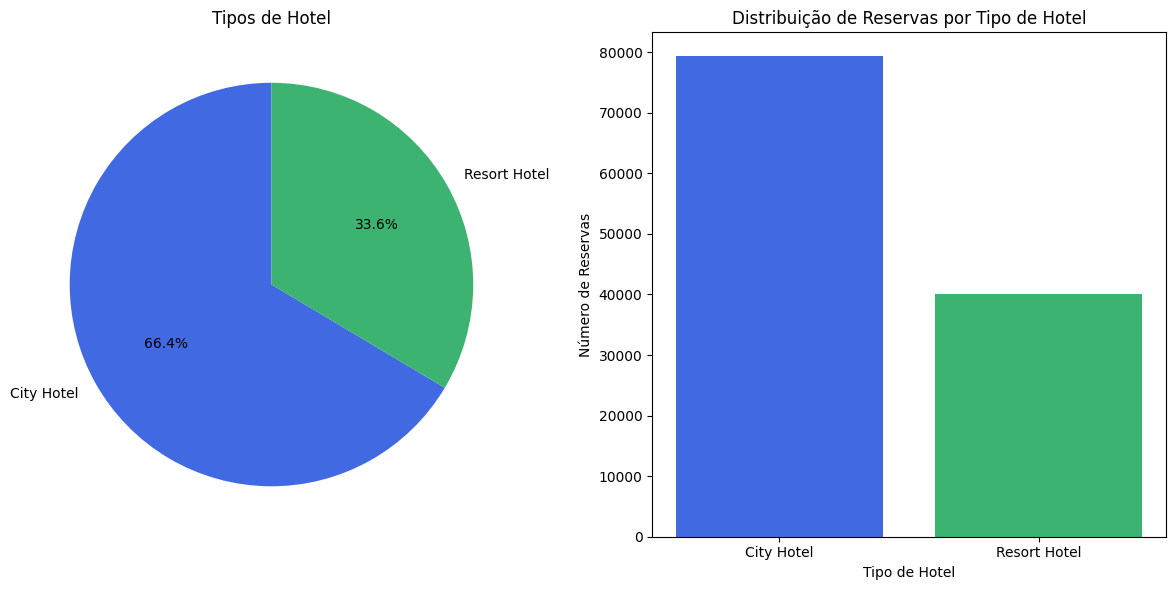

In [23]:
contagem_tipos_hotel = dataset['hotel'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(contagem_tipos_hotel, labels=contagem_tipos_hotel.index, autopct='%1.1f%%', startangle=90, colors=['royalblue', 'mediumseagreen'])
axes[0].set_title('Tipos de Hotel')

axes[1].bar(contagem_tipos_hotel.index, contagem_tipos_hotel, color=['royalblue', 'mediumseagreen'])
axes[1].set_xlabel('Tipo de Hotel')
axes[1].set_ylabel('Número de Reservas')
axes[1].set_title('Distribuição de Reservas por Tipo de Hotel')

plt.tight_layout()
plt.show()

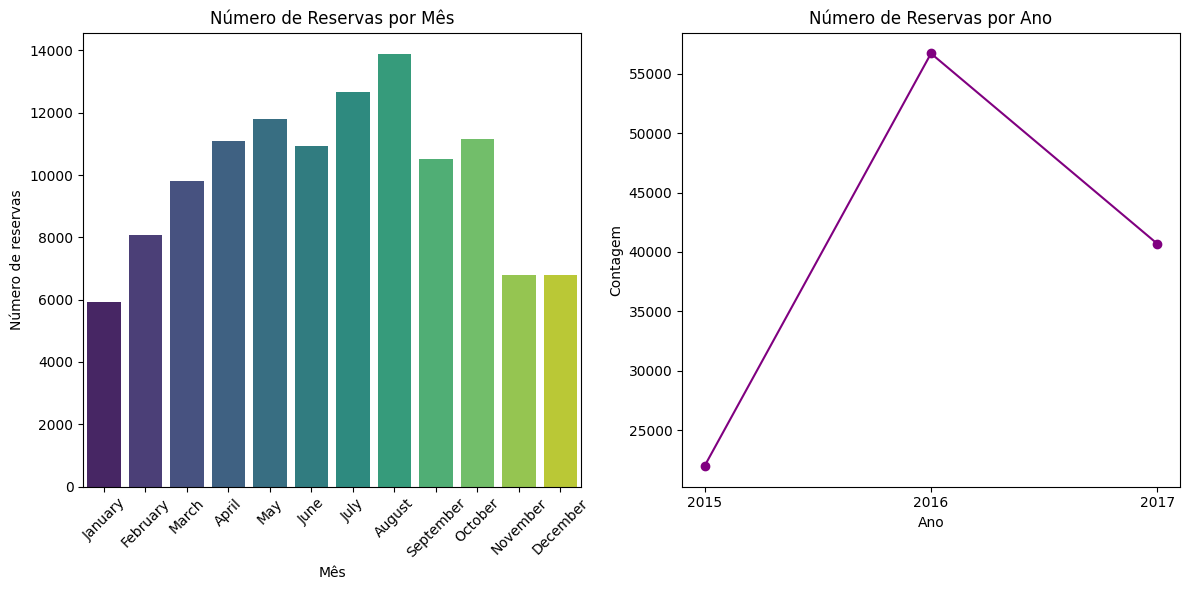

In [24]:
ordem_meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.countplot(data=dataset_clean, x='arrival_date_month', palette='viridis', order=ordem_meses)
plt.xticks(rotation=45)
plt.title('Número de Reservas por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de reservas')


plt.subplot(1, 2, 2)
yearly_data = dataset_clean.groupby('arrival_date_year').size()
yearly_data.plot(kind='line', marker='o', color='purple')
plt.title('Número de Reservas por Ano')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.xticks(yearly_data.index)


plt.tight_layout()
plt.show()



Visão geral do conjunto de dados:

* Aproximadamente 66,4% das reservas foram efetuadas em "City Hotels", enquanto os "Resort Hotels" representaram os restantes 33,6% das reservas. Esse cenário demonstra uma clara predominância das reservas em estabelecimentos urbanos em comparação com os resorts.

* Observou-se que o mês de agosto registrou o maior volume de reservas. Isso pode ser atribuído, em grande parte, à coincidência das férias escolares em muitos países durante esse período, tornando-o uma escolha popular para viagens em família.

* Quanto à tendência ao longo dos anos, houve um aumento notável no número de reservas em 2016, seguido por uma estabilização em 2017. Esse padrão pode sugerir fatores específicos que impulsionaram o crescimento em 2016, seguidos por um período de relativa estabilidade nas reservas no ano subsequente.







<ipython-input-25-05c9663e044e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset_clean.corr()


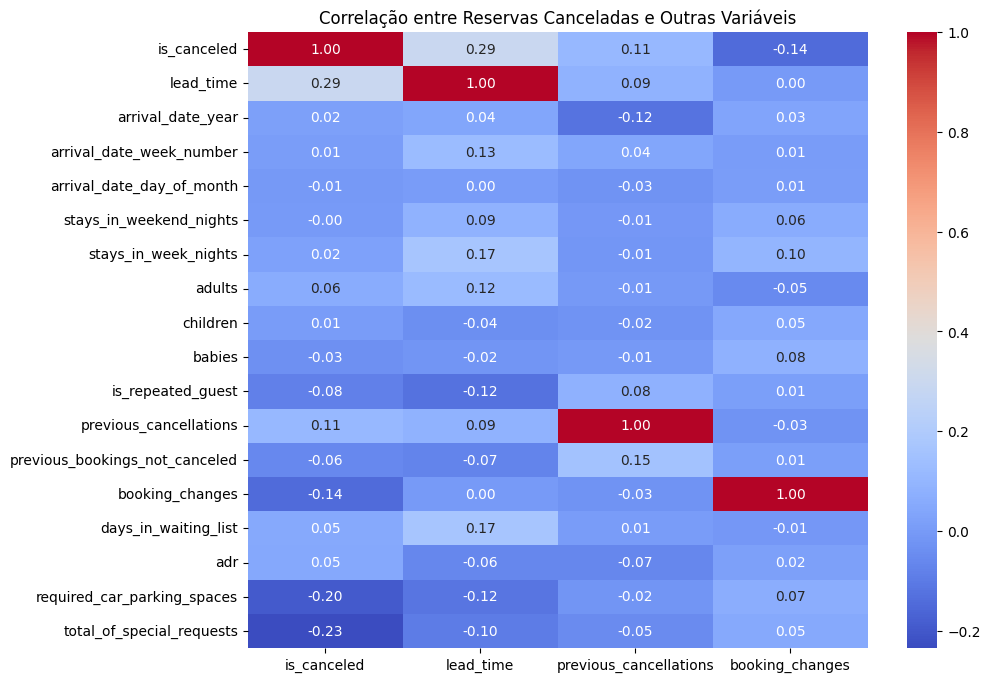

In [25]:
correlation_matrix = dataset_clean.corr()

variables_of_interest = ['is_canceled', 'lead_time', 'previous_cancellations', 'booking_changes']

correlation_subset = correlation_matrix[variables_of_interest]

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Reservas Canceladas e Outras Variáveis')
plt.show()

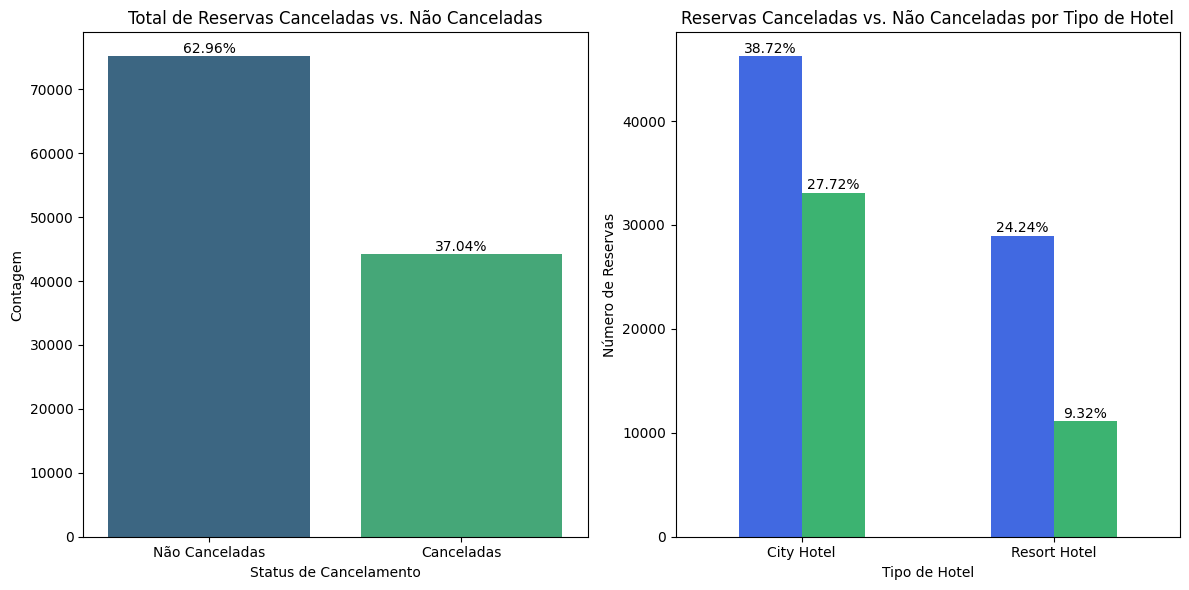

In [58]:
cancelados = dataset_clean['is_canceled'].value_counts()

contagem_cancelamento_por_hotel = dataset.groupby(['hotel', 'is_canceled']).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))


sns.barplot(x=cancelados.index, y=cancelados.values, palette='viridis', ax=axes[0])
axes[0].set_title('Total de Reservas Canceladas vs. Não Canceladas')
axes[0].set_xlabel('Status de Cancelamento')
axes[0].set_ylabel('Contagem')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Não Canceladas', 'Canceladas'])

total_cancelados = cancelados.sum()
for i, value in enumerate(cancelados.values):
    axes[0].text(i, value + 50, f'{(value / total_cancelados) * 100:.2f}%', ha='center', va='bottom')


ax = contagem_cancelamento_por_hotel.plot(kind='bar', color=['royalblue', 'mediumseagreen'], legend=False, ax=axes[1])
axes[1].set_xlabel('Tipo de Hotel')
axes[1].set_ylabel('Número de Reservas')
axes[1].set_title('Reservas Canceladas vs. Não Canceladas por Tipo de Hotel')
axes[1].set_xticklabels(contagem_cancelamento_por_hotel.index, rotation=0)


for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{(height / total_cancelados) * 100:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

A taxa de cancelamento de 37,04% é considerável e merece atenção. Isso indica que mais de um terço das reservas feitas foram eventualmente canceladas. Isso pode ter um impacto significativo nos negócios e na gestão de recursos para hotéis.

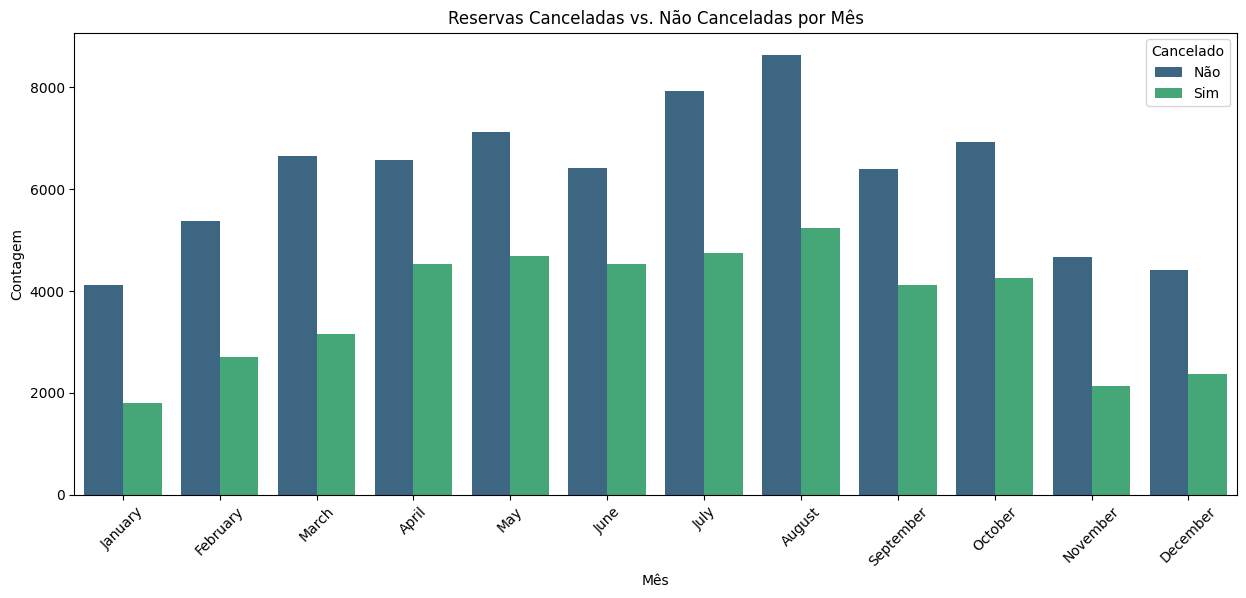

In [50]:
plt.figure(figsize=(15, 6))


sns.countplot(data=dataset_clean, x='arrival_date_month', hue='is_canceled', palette='viridis', order=ordem_meses)
plt.xticks(rotation=45)
plt.title('Reservas Canceladas vs. Não Canceladas por Mês')
plt.xlabel('Mês')
plt.ylabel('Contagem')

plt.legend(title='Cancelado', labels=['Não', 'Sim'])

plt.show()

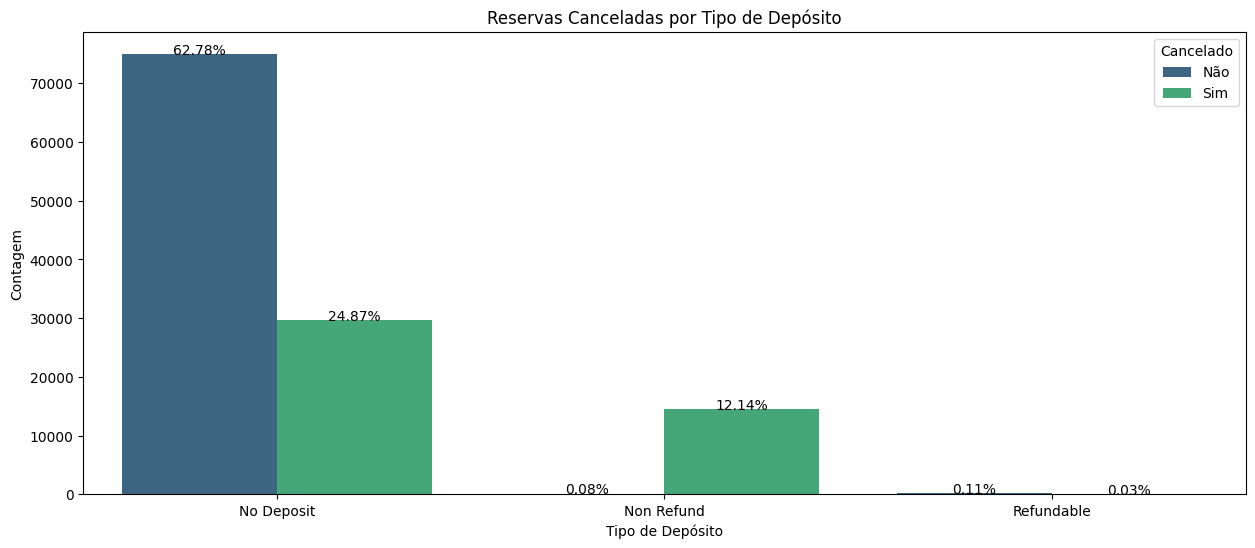

In [53]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=dataset_clean, x='deposit_type', hue='is_canceled', palette='viridis')

# Calcule as porcentagens e adicione-as acima das barras
total = len(dataset_clean)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.title('Reservas Canceladas por Tipo de Depósito')
plt.xlabel('Tipo de Depósito')
plt.ylabel('Contagem')
plt.legend(title='Cancelado', labels=['Não', 'Sim'])
plt.show()

As opções de tipo de Depósito referem-se às políticas de depósito para reservas em hotéis:

* No Deposit (Sem Depósito): Isso significa que o hóspede não é obrigado a fazer nenhum depósito antecipado para garantir a reserva. Em caso de cancelamento, o hóspede não perderá dinheiro devido a um depósito. Podemos observar que a maioria das reservas são realizadas sem depósito e aqui ocurre a maior taxa de cancelação.

* Non Refund (Não Reembolsável): Nesse caso, o hóspede pode ter feito um depósito ou pré-pagamento ao fazer a reserva, mas esse valor não é reembolsável em caso de cancelamento. Ou seja, se o hóspede cancelar a reserva, ele não receberá o dinheiro de volta, aquí a taxa de cancelação é de 12,4% um valor considerável. e que representa a quase o total de reservas nesta modalidade.

* Refundable (Reembolsável): Quando um hóspede seleciona essa opção, ele geralmente faz um depósito ou pré-pagamento no momento da reserva, mas esse valor é reembolsável se o hóspede cancelar dentro dos termos e condições definidos pelo hotel. Em outras palavras, se o hóspede cancelar a reserva dentro do prazo estipulado, ele receberá o dinheiro de volta, nesta modalidade a quantidades de reservas é minima.

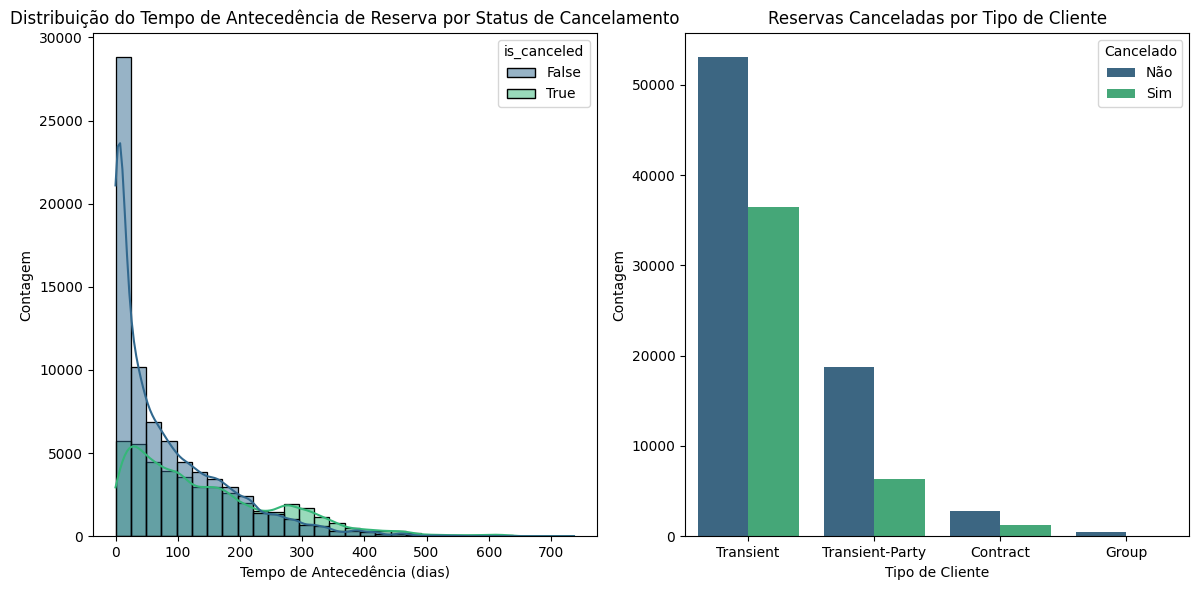

In [28]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=dataset_clean, x='lead_time', bins=30, hue='is_canceled', kde=True, palette='viridis')
plt.title('Distribuição do Tempo de Antecedência de Reserva por Status de Cancelamento')
plt.xlabel('Tempo de Antecedência (dias)')
plt.ylabel('Contagem')

plt.subplot(1, 2, 2)
sns.countplot(data=dataset_clean, x='customer_type', hue='is_canceled', palette='viridis')
plt.title('Reservas Canceladas por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Contagem')
plt.legend(title='Cancelado', labels=['Não', 'Sim'])


plt.tight_layout()
plt.show()



No gráfico de distribuição, podemos observar que a possibilidade de uma reserva ser cancelada aumenta à medida que o tempo de antecedência da reserva aumenta. E a maior quantidade de reservas canceladas corresponde a Transient, isso se refere a reservas individuais, ou seja, reservas de clientes que não fazem parte de um grupo ou empresa. São hóspedes individuais que fazem reservas independentes.


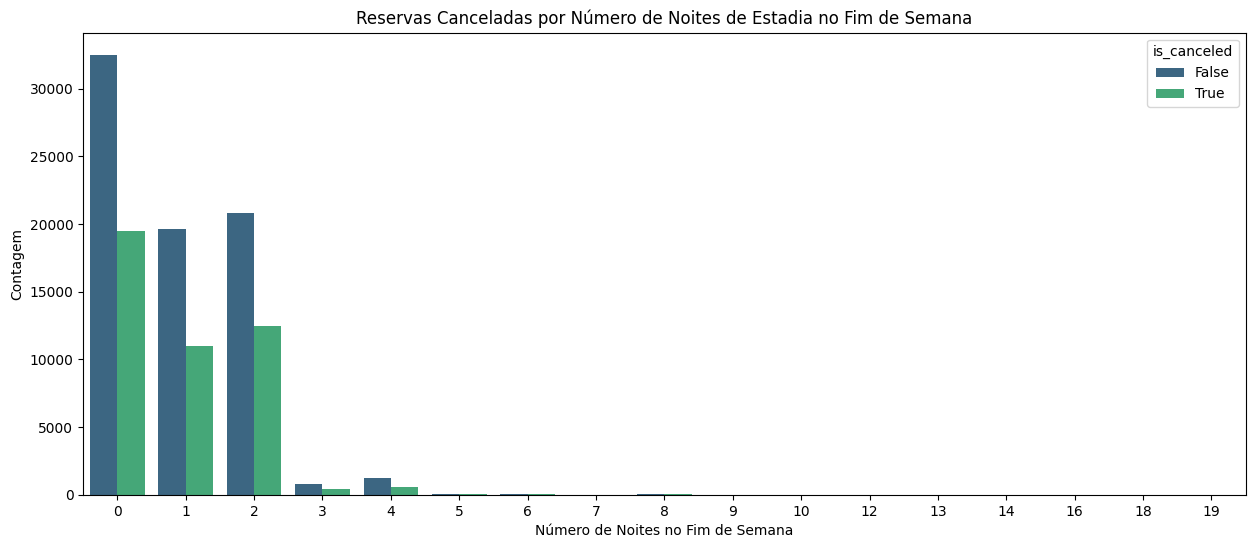

In [54]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset_clean, x='stays_in_weekend_nights', hue='is_canceled', palette='viridis')
plt.title('Reservas Canceladas por Número de Noites de Estadia no Fim de Semana')
plt.xlabel('Número de Noites no Fim de Semana')
plt.ylabel('Contagem')
plt.show()

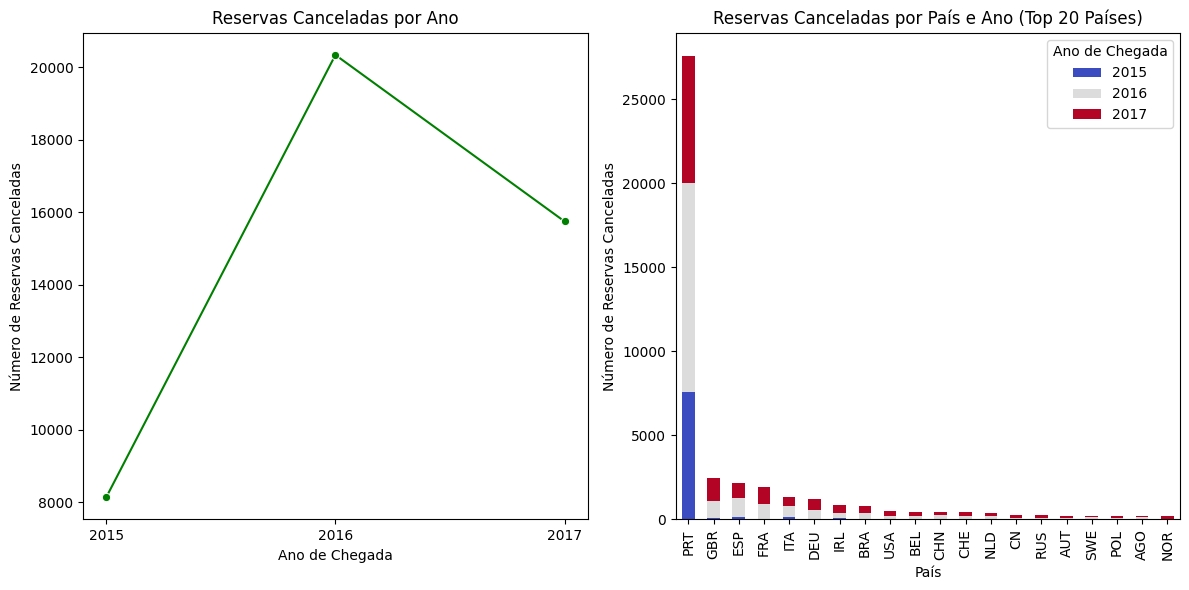

In [45]:
canceled_by_year = dataset_clean.groupby('arrival_date_year')['is_canceled'].sum()
canceled_reservations = dataset_clean[dataset_clean['is_canceled'] == True]

canceled_by_country_and_year = canceled_reservations.groupby(['country', 'arrival_date_year']).size().unstack(fill_value=0)
canceled_by_country_and_year['Total'] = canceled_by_country_and_year.sum(axis=1)
canceled_by_country_and_year = canceled_by_country_and_year.sort_values(by='Total', ascending=False).drop('Total', axis=1)
top_20_countries = canceled_by_country_and_year.head(20)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))


sns.lineplot(x=canceled_by_year.index, y=canceled_by_year.values, marker='o', color='green', ax=axes[0])
axes[0].set_title('Reservas Canceladas por Ano')
axes[0].set_xlabel('Ano de Chegada')
axes[0].set_ylabel('Número de Reservas Canceladas')
axes[0].set_xticks(canceled_by_year.index)


top_20_countries.plot(kind='bar', stacked=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Reservas Canceladas por País e Ano (Top 20 Países)')
axes[1].set_xlabel('País')
axes[1].set_ylabel('Número de Reservas Canceladas')
axes[1].legend(title='Ano de Chegada')

plt.tight_layout()


plt.show()

Dos gráficos, podemos afirmar que a maioria das reservas canceladas provém de Portugal. Esta informação sugere que pode haver uma tendência específica entre os clientes portugueses de cancelar suas reservas com mais frequência em comparação com outros países. Isso pode ser influenciado por vários fatores, como políticas de cancelamento, mudanças de planos dos hóspedes ou mesmo condições econômicas.

### **Resumo**

O conjunto de dados apresenta informações sobre reservas de hotéis, incluindo detalhes sobre o tipo de hotel, período de reserva, taxas de cancelamento e outras variáveis relacionadas. Algumas observações-chave incluem:

* Preferência por Hotéis Urbanos: A maioria das reservas (66,4%) foram feitas em "City Hotels," enquanto os "Resort Hotels" representaram 33,6% das reservas. Isso indica uma clara preferência por estabelecimentos urbanos em relação aos resorts.

* Reservas em Agosto: O mês de agosto registrou o maior volume de reservas. Isso pode ser atribuído às férias escolares em muitos países, tornando-o um período popular para viagens em família.

* Tendência de Reservas ao Longo dos Anos: Houve um aumento notável no número de reservas em 2016, seguido por uma estabilização em 2017. Esse padrão sugere fatores específicos que impulsionaram o crescimento em 2016, seguidos por um período de relativa estabilidade nas reservas no ano seguinte.

* Taxa de Cancelamento Significativa: A taxa de cancelamento de 37,04% é considerável e merece atenção. Isso indica que mais de um terço das reservas feitas foram eventualmente canceladas, o que pode impactar negativamente os negócios e a gestão de recursos para hotéis.

* Políticas de Depósito: Existem três tipos de políticas de depósito: "No Deposit" (Sem Depósito), "Non Refund" (Não Reembolsável) e "Refundable" (Reembolsável). A maioria das reservas é feita sem depósito, e a taxa de cancelamento é significativamente maior nessa modalidade.

* Análise de Cancelamentos por País: Portugal é o país de origem que mais contribui para as reservas canceladas, sugerindo uma tendência específica de clientes portugueses em cancelar reservas com frequência.